In [1]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../.env", override=True)

True

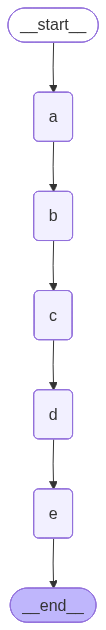

In [2]:
from IPython.display import Image, display
from typing import Any
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    state: str

class ReturnNodeValue:
    def __init__(self, node_secret: str):
        self._value = node_secret

    def __call__(self, state: State) -> Any:
        print(f"Adding {self._value} to {state['state']}")
        return {"state": [self._value]}

builder = StateGraph(State)
 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))
builder.add_node("e", ReturnNodeValue("I'm E"))

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("b", "c")
builder.add_edge("c", "d")
builder.add_edge("d", "e")
builder.add_edge("e", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [3]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm C to ["I'm B"]
Adding I'm D to ["I'm C"]
Adding I'm E to ["I'm D"]


{'state': ["I'm E"]}

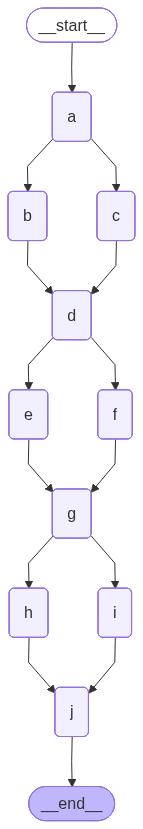

In [4]:
builder = StateGraph(State)

builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))
builder.add_node("e", ReturnNodeValue("I'm E"))
builder.add_node("f", ReturnNodeValue("I'm F"))
builder.add_node("g", ReturnNodeValue("I'm G"))
builder.add_node("h", ReturnNodeValue("I'm H"))
builder.add_node("i", ReturnNodeValue("I'm I"))
builder.add_node("j", ReturnNodeValue("I'm J"))

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", "e")
builder.add_edge("d", "f")
builder.add_edge("e", "g")
builder.add_edge("f", "g")
builder.add_edge("g", "h")
builder.add_edge("g", "i")
builder.add_edge("h", "j")
builder.add_edge("i", "j")
builder.add_edge("j", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
from langgraph.errors import InvalidUpdateError

try:
    graph.invoke({"state": []})
except InvalidUpdateError as e:
    print(f"An error occurred: {e}")

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm C to ["I'm A"]
An error occurred: At key 'state': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_CONCURRENT_GRAPH_UPDATE


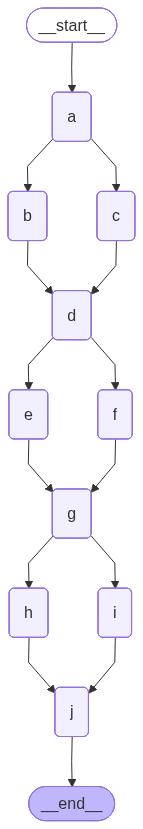

In [6]:
import operator
from typing import Annotated

class State(TypedDict):
    state: Annotated[list, operator.add]

builder = StateGraph(State)

builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))
builder.add_node("e", ReturnNodeValue("I'm E"))
builder.add_node("f", ReturnNodeValue("I'm F"))
builder.add_node("g", ReturnNodeValue("I'm G"))
builder.add_node("h", ReturnNodeValue("I'm H"))
builder.add_node("i", ReturnNodeValue("I'm I"))
builder.add_node("j", ReturnNodeValue("I'm J"))

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", "e")
builder.add_edge("d", "f")
builder.add_edge("e", "g")
builder.add_edge("f", "g")
builder.add_edge("g", "h")
builder.add_edge("g", "i")
builder.add_edge("h", "j")
builder.add_edge("i", "j")
builder.add_edge("j", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm C to ["I'm A"]
Adding I'm D to ["I'm A", "I'm B", "I'm C"]
Adding I'm E to ["I'm A", "I'm B", "I'm C", "I'm D"]
Adding I'm F to ["I'm A", "I'm B", "I'm C", "I'm D"]
Adding I'm G to ["I'm A", "I'm B", "I'm C", "I'm D", "I'm E", "I'm F"]
Adding I'm I to ["I'm A", "I'm B", "I'm C", "I'm D", "I'm E", "I'm F", "I'm G"]
Adding I'm H to ["I'm A", "I'm B", "I'm C", "I'm D", "I'm E", "I'm F", "I'm G"]
Adding I'm J to ["I'm A", "I'm B", "I'm C", "I'm D", "I'm E", "I'm F", "I'm G", "I'm H", "I'm I"]


{'state': ["I'm A",
  "I'm B",
  "I'm C",
  "I'm D",
  "I'm E",
  "I'm F",
  "I'm G",
  "I'm H",
  "I'm I",
  "I'm J"]}

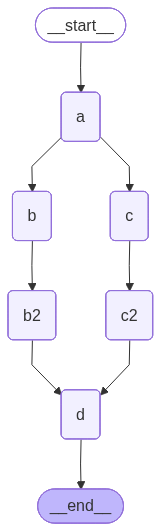

In [9]:
builder = StateGraph(State)

builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("b2", ReturnNodeValue("I'm B2"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("c2", ReturnNodeValue("I'm C2"))
builder.add_node("d", ReturnNodeValue("I'm D"))

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "b2")
builder.add_edge("c", "c2")
builder.add_edge(["b2", "c2"], "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm C to ["I'm A"]
Adding I'm B2 to ["I'm A", "I'm B", "I'm C"]
Adding I'm C2 to ["I'm A", "I'm B", "I'm C"]
Adding I'm D to ["I'm A", "I'm B", "I'm C", "I'm B2", "I'm C2"]


{'state': ["I'm A", "I'm B", "I'm C", "I'm B2", "I'm C2", "I'm D"]}

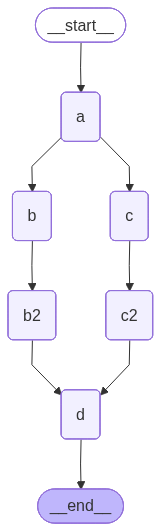

In [11]:
def sorting_reducer(left, right):
    """ Combines and sorts the values in a list"""
    
    if not isinstance(left, list):
        left = [left]
    if not isinstance(right, list):
        right = [right]
    
    return sorted(left + right, reverse=False)

class State(TypedDict):
    state: Annotated[list, sorting_reducer]

builder = StateGraph(State)
 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("b2", ReturnNodeValue("I'm B2"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("c2", ReturnNodeValue("I'm C2"))
builder.add_node("d", ReturnNodeValue("I'm D"))

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "b2")
builder.add_edge("c", "c2")
builder.add_edge(["b2", "c2"], "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm C to ["I'm A"]
Adding I'm B2 to ["I'm A", "I'm B", "I'm C"]
Adding I'm C2 to ["I'm A", "I'm B", "I'm C"]
Adding I'm D to ["I'm A", "I'm B", "I'm B2", "I'm C", "I'm C2"]


{'state': ["I'm A", "I'm B", "I'm B2", "I'm C", "I'm C2", "I'm D"]}

In [13]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0) 

In [14]:
class State(TypedDict):
    question: str
    answer: str
    context: Annotated[list, operator.add]

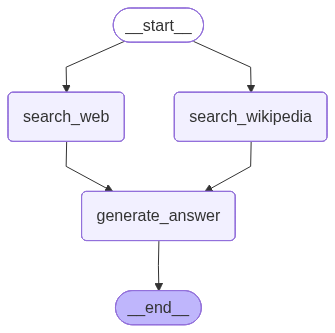

In [15]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_community.document_loaders import WikipediaLoader
from langchain_community.tools import TavilySearchResults

def search_web(state):
    """ Retrieve docs from web search """

    tavily_search = TavilySearchResults(max_results=3)
    search_docs = tavily_search.invoke(state['question'])

    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}">\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 

def search_wikipedia(state):
    """ Retrieve docs from wikipedia """

    search_docs = WikipediaLoader(query=state['question'], 
                                  load_max_docs=2).load()

    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}">\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 

def generate_answer(state):
    """ Node to answer a question """

    context = state["context"]
    question = state["question"]

    answer_template = """Answer the question {question} using this context: {context}"""
    answer_instructions = answer_template.format(question=question, 
                                                       context=context)    

    answer = llm.invoke([SystemMessage(content=answer_instructions)]+[HumanMessage(content=f"Answer the question.")])

    return {"answer": answer}

builder = StateGraph(State)

builder.add_node("search_web",search_web)
builder.add_node("search_wikipedia", search_wikipedia)
builder.add_node("generate_answer", generate_answer)

builder.add_edge(START, "search_wikipedia")
builder.add_edge(START, "search_web")
builder.add_edge("search_wikipedia", "generate_answer")
builder.add_edge("search_web", "generate_answer")
builder.add_edge("generate_answer", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
result = graph.invoke({"question": "How was FC Barcelona's 2024/25 season"})
result['answer'].content

C:\Users\jaind\AppData\Local\Temp\ipykernel_2380\534792625.py:8: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults(max_results=3)


"FC Barcelona's 2024/25 season was outstanding and is considered one of the greatest in the club's history. They completed a domestic treble, re-establishing themselves as one of the top clubs in world soccer. The team played an attractive, attacking style and had stars in every area. A standout player was 17-year-old Lamine Yamal, who had a phenomenal season and was a strong candidate for the Ballon d'Or. Barcelona finished first in La Liga with 88 points, ahead of Real Madrid and Atlético Madrid. They also had strong performances in the UEFA Champions League and domestic cups, showcasing a dominant and successful campaign overall."

In [18]:
from langgraph_sdk import get_client
client = get_client(url="http://127.0.0.1:2024")

In [19]:
thread = await client.threads.create()
input_question = {"question": "How was FC Barcelona's 2024/25 season"}
async for event in client.runs.stream(thread["thread_id"], 
                                      assistant_id="parallelization", 
                                      input=input_question, 
                                      stream_mode="values"): 
    if event.data is not None:
        answer = event.data.get('answer', None)
        if answer:
            print(answer['content'])

FC Barcelona's 2024/25 season was highly successful, as they completed a domestic treble and re-established themselves as one of the top clubs in world soccer. They won LaLiga, finishing first with 88 points, four points ahead of their rivals Real Madrid. Barcelona also had a strong performance in the UEFA Champions League, reaching the semi-finals. The team was characterized by an attractive, attacking style of play and had standout performances from players like Lamine Yamal, who was named the Player of the Season. Yamal also scored the Goal of the Season against Espanyol. Overall, the season marked a significant turnaround for Barcelona, as they moved past a period of mediocrity to dominate Spanish soccer once again.
